trying something for yeast segmentation and counting 

In [1]:
def generate_biomodal_2d_data():
    import numpy as np
        
    rs = np.random.RandomState(seed=0)

    x1 = rs.normal(3, 1, (150,2))
    x2 = rs.normal(8, 1.5, (150,2))

    x_all = np.concatenate((x1, x2), axis=0)
    rs.shuffle(x_all)
    return x_all

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from skimage.io import imread
from pyclesperanto_prototype import imshow, replace_intensities, relabel_sequential
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.segmentation import clear_border
import numpy as np
import pandas as pd
from microfilm.microplot import microshow
import matplotlib.pyplot as plt



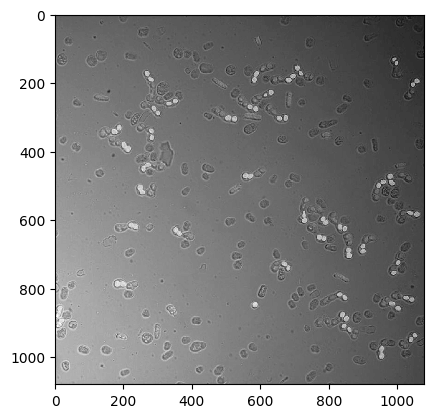

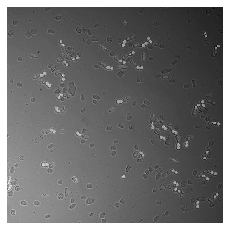

In [3]:
image = imread('/Users/aaditmahajan/Documents/segregation_data/images/train/Picture_1.jpg', as_gray=True)
imshow(image)
microshow(image)

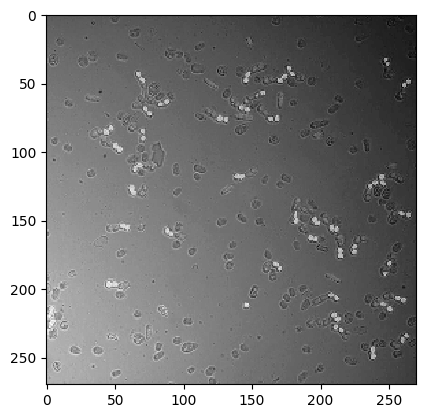

In [4]:
image.shape 
sub_sampled = image[::4, ::4]
imshow(sub_sampled)

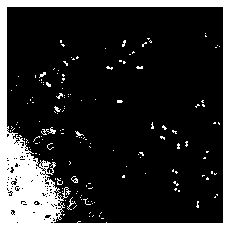

In [5]:
mask = image > 0.335
microshow(mask)


Text(0, 0.5, 'elongation')

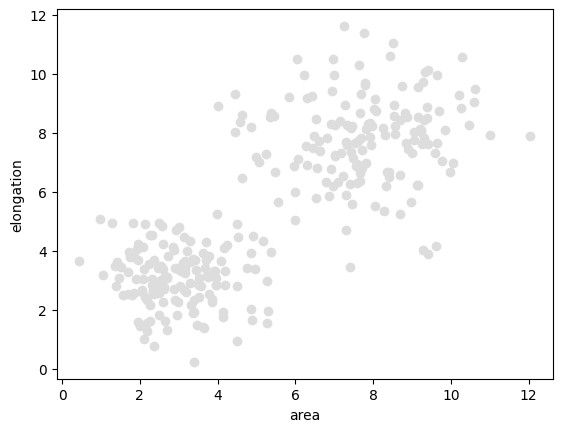

In [6]:
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score
data = generate_biomodal_2d_data()

plt.scatter(data[:, 0], data[:, 1], c="#DDDDDD")
plt.xlabel('area')
plt.ylabel('elongation')


In [7]:
data_to_annotate = data[:20]

pd.DataFrame(data_to_annotate, columns=['area','elongation'])


,area,elongation
0,3.950088,2.848643
1,4.955912,3.390093
2,7.469852,5.575289
3,2.544467,3.017479
4,3.465662,1.463756
5,3.156507,3.232181
6,9.978705,6.676372
7,6.001683,5.047063
8,2.457139,3.416050
9,3.672295,3.407462


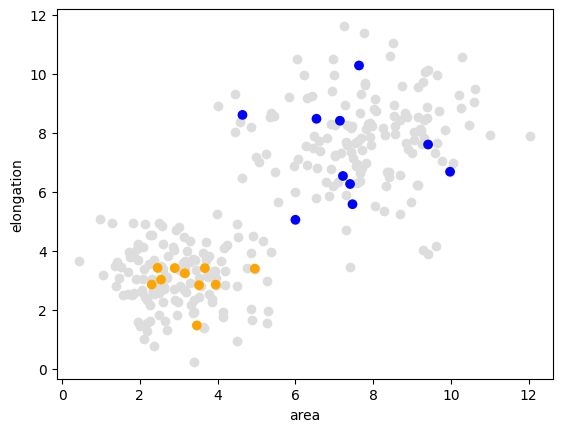

In [8]:
manual_annotation = [1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2]

plt.scatter(data[:, 0], data[:, 1], c='#DDDDDD')
plt.xlabel('area')
plt.ylabel('elongation')

colors = ['orange', 'blue']

anc = [colors[i-1] for i in manual_annotation]
plt.scatter(data_to_annotate[:, 0], data_to_annotate[:, 1], c=anc)


In [9]:
train_data = data_to_annotate[:10]
validation_data = data_to_annotate[10:]

train_annotation = manual_annotation[:10]
validation_annotation = manual_annotation[10:]

classifier = SVC()
classifier.fit(train_data, train_annotation)


SVC()

In [10]:
result = classifier.predict(validation_data)

restable = {
    "predicted": result, 
    "annotation": validation_annotation
}
pd.DataFrame(restable)


,predicted,annotation
0,2,2
1,1,1
2,1,1
3,2,2
4,1,1
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


In [11]:
accuracy_score(validation_annotation, result)

1.0

In [12]:
precision_score(validation_annotation, result)

1.0

In [13]:
recall_score(validation_annotation, result)

1.0

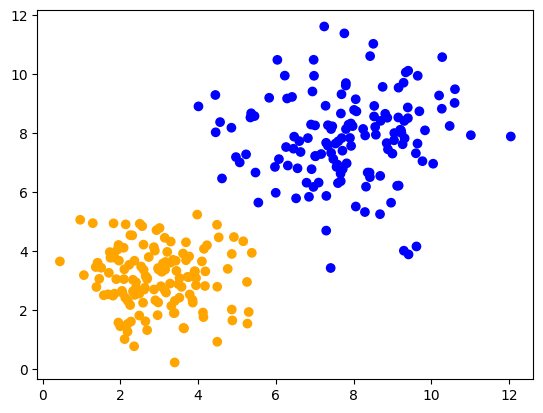

In [14]:
remaining_data = data[20:]
prediction = classifier.predict(remaining_data)

anc_rem = [colors[i-1] for i in prediction]
plt.scatter(remaining_data[:, 0], remaining_data[:, 1], c = anc_rem)


In [15]:
from sklearn.mixture import GaussianMixture
NO_OF_CLASSES = 2
classifier = GaussianMixture(n_components=NO_OF_CLASSES)
classifier.fit(data)


GaussianMixture(n_components=2)

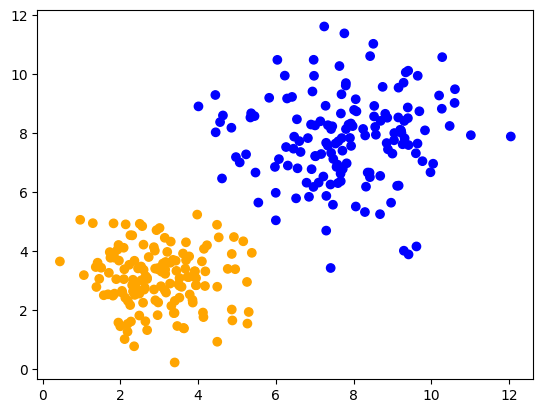

In [16]:
prediction = classifier.predict(data)
predicted_colors = [colors[i] for i in prediction]

plt.scatter(data[:, 0], data[:, 1], c=predicted_colors)

In [17]:
import pyclesperanto_prototype as cle
cle.available_device_names()


['Apple M1']

In [18]:
cle.get_device()

<Apple M1 on Platform: Apple (3 refs)>

cl.OCLArray([[0.23137255, 0.23137255, 0.23137255, ..., 0.11764706, 0.11764706,
        0.11764706],
       [0.23529412, 0.23529412, 0.23529412, ..., 0.12156863, 0.12156863,
        0.12156863],
       [0.23921569, 0.23921569, 0.23529412, ..., 0.12941177, 0.12941177,
        0.1254902 ],
       ...,
       [0.3647059 , 0.3647059 , 0.3647059 , ..., 0.18039216, 0.1764706 ,
        0.17254902],
       [0.3647059 , 0.3647059 , 0.3647059 , ..., 0.18039216, 0.1764706 ,
        0.17254902],
       [0.36078432, 0.36078432, 0.36078432, ..., 0.1764706 , 0.17254902,
        0.17254902]], dtype=float32)
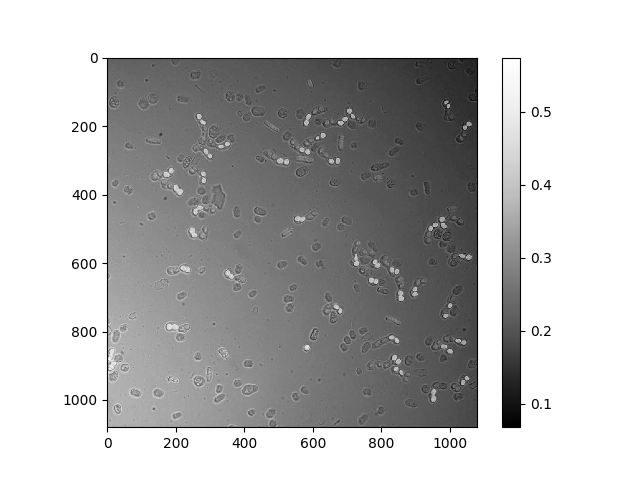
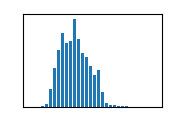

In [19]:
blurred = cle.gaussian_blur(image)
blurred

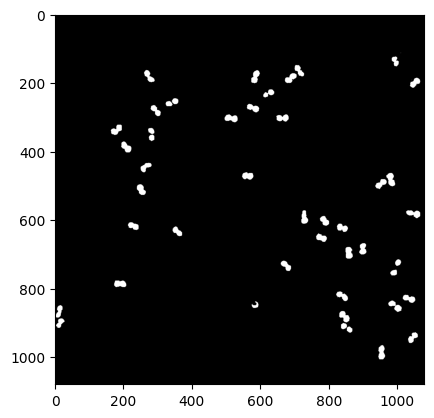

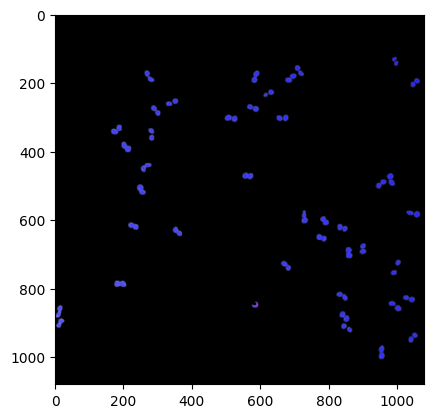

In [20]:
import cv2
raw = cv2.imread('/Users/aaditmahajan/Documents/segregation_data/images/train/Picture_1.jpg')

hsv = cv2.cvtColor(raw, cv2.COLOR_BGR2HSV)
result = raw.copy()
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])

lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])
 
lower_mask = cv2.inRange(hsv, lower1, upper1)
upper_mask = cv2.inRange(hsv, lower2, upper2)

full_mask = lower_mask + upper_mask

result_blue = cv2.bitwise_and(result, result, mask = full_mask)

plt.imshow(full_mask, cmap = 'gray')
plt.show()
plt.imshow(result_blue, cmap = 'gray')
plt.show()


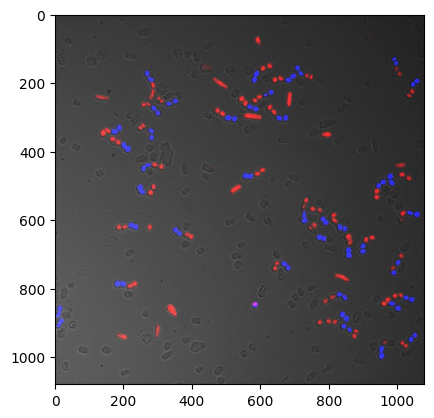

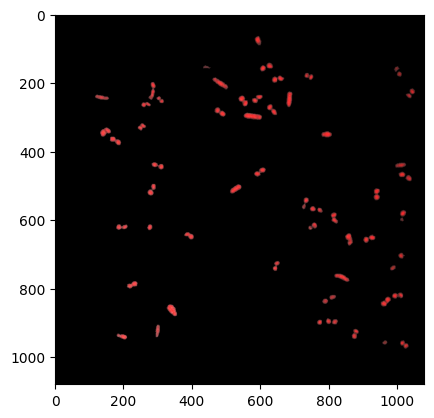

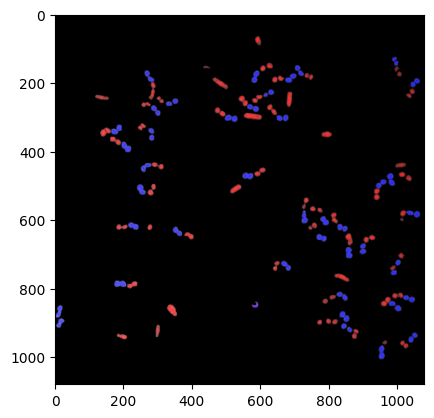

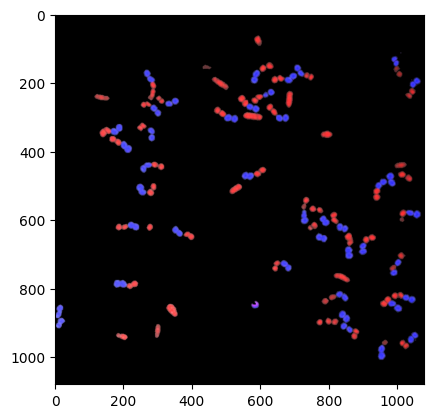

In [21]:
lower_blue = np.array([100, 100, 20])
upper_blue = np.array([140, 255, 255])

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

result_red = cv2.bitwise_and(raw, raw, mask = mask_blue)
spores = result_red + result_blue

plt.imshow(raw, cmap = 'gray')
plt.show()
plt.imshow(result_red, cmap = 'gray')
plt.show()

plt.imshow(spores, cmap='gray')
plt.show()

spores = cv2.dilate(spores, kernel=cv2.getStructuringElement(cv2.MORPH_DILATE, (3,3)), iterations=2)
plt.imshow(spores)
plt.show()

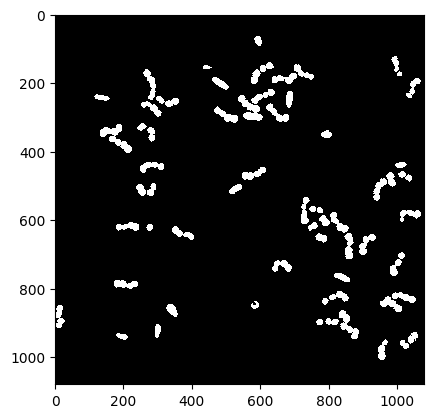

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
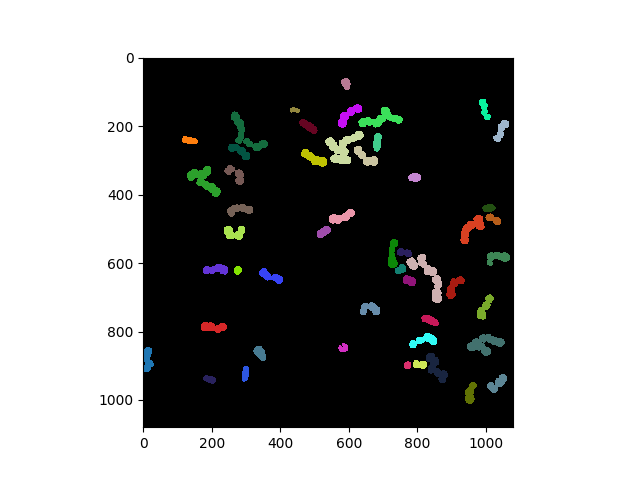

In [22]:
binarized = cle.threshold_otsu(cv2.cvtColor(spores, cv2.COLOR_BGR2GRAY))
imshow(binarized)
binary_blur = cle.gaussian_blur(binarized, sigma_x=0.72, sigma_y=0.72, sigma_z=0.72)
labels = cle.connected_components_labeling_box(binary_blur)
labels

/opt/homebrew/lib/python3.11/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


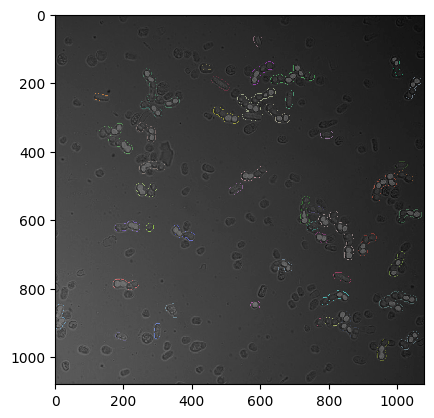

In [23]:
label_edges = cle.detect_label_edges(labels) * labels
cle.imshow(image, continue_drawing=True, color_map="Greys_r")
cle.imshow(label_edges, labels=True, alpha=0.5)

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
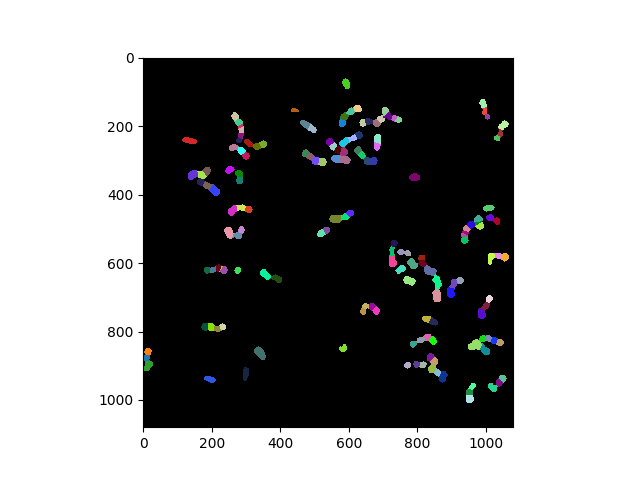

In [24]:
labels2 = cle.voronoi_otsu_labeling(binary_blur, spot_sigma=5, outline_sigma=3)
labels2

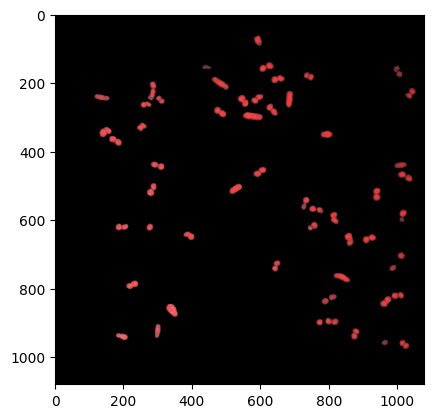

In [25]:
result_red = cv2.dilate(result_red, kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=1)
plt.imshow(result_red, cmap='gray')
plt.show()



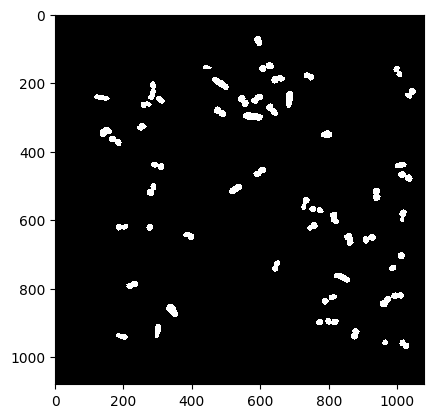

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
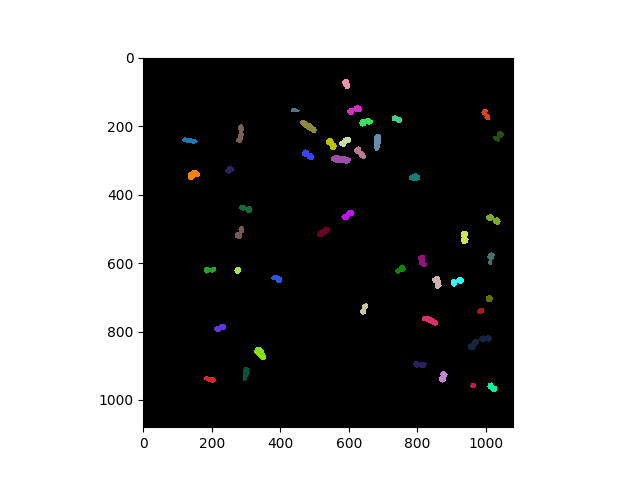

In [26]:
gsred = cle.threshold_otsu(cv2.cvtColor(result_red, cv2.COLOR_BGR2GRAY))
imshow(gsred)
redlabel = cle.voronoi_otsu_labeling(cle.gaussian_blur(gsred), spot_sigma=15, outline_sigma=1)
redlabel



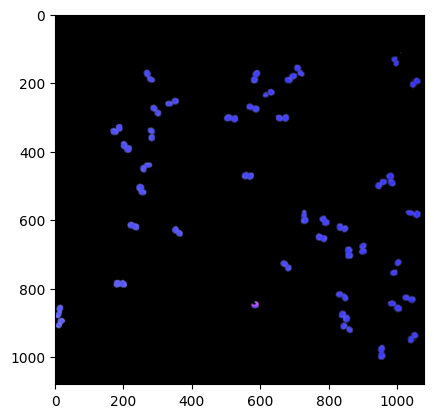

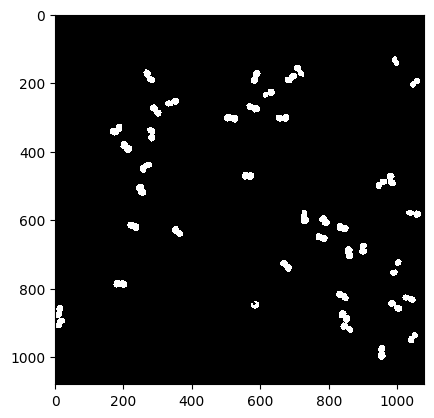

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
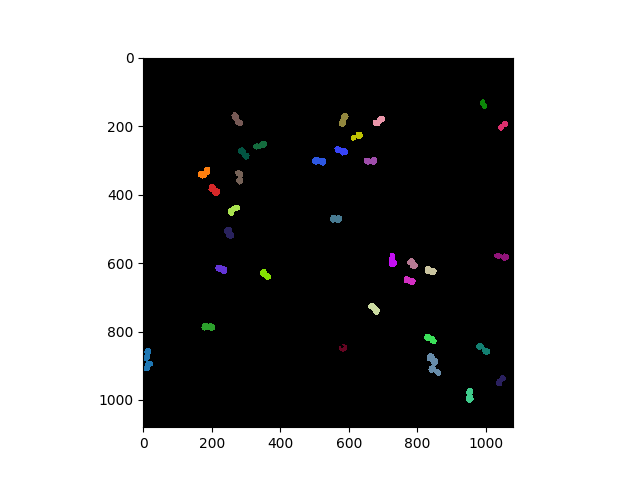

In [27]:
result_blue_dilated = cv2.dilate(result_blue, kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=1)
plt.imshow(result_blue_dilated, cmap='gray')
plt.show()

gsblue = cle.threshold_otsu(cv2.cvtColor(result_blue_dilated, cv2.COLOR_BGR2GRAY))
imshow(gsblue)
bluelabel = cle.voronoi_otsu_labeling(cle.gaussian_blur(gsblue), spot_sigma=20, outline_sigma=1)
bluelabel

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
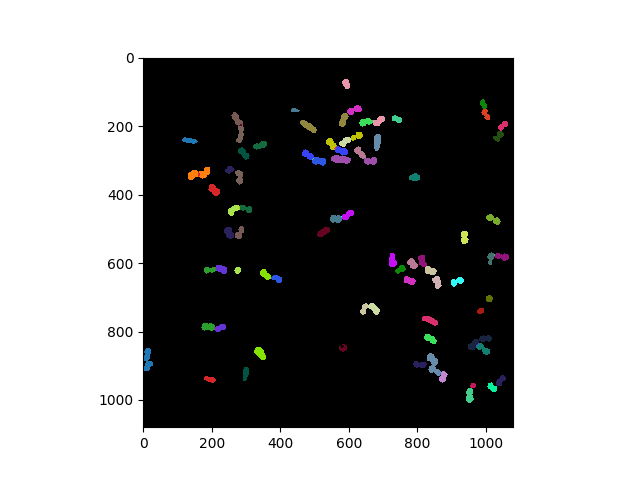

In [28]:
all_labels = redlabel + bluelabel
all_labels

# plt.imshow(all_labels)
# plt.show()
